# Face Recovery - Olivetti Faces

In [1]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
%matplotlib inline

###### A. Fetch and load the data with the fetch_olivetti_faces method from the module sklearn.datasets.

In [2]:
faces_dataset = fetch_olivetti_faces()

###### B. Demean each face in the data set (no need to divide by standard deviation as every dimension is a number between a fixed range representing a pixel).

In [3]:
# get the faces in the data
faces = faces_dataset.images 
single_mean = sum(faces) / len(faces)
# subtracting the sample mean from each observation
mean = faces/len(faces)
faces = faces - mean

###### C. Compute and display the first 9 eigenfaces.

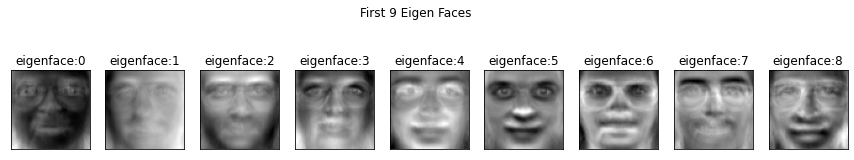

In [18]:
X = faces.reshape((faces.shape[0], faces.shape[1] * faces.shape[2]))
# print(X.shape)

# Use PCA as SVD in creating the matrix for eigenfaces 
n_components = 9 # the number of eigen faces needed

pca=PCA(n_components=n_components, whiten=True, svd_solver='auto')
pca.fit(X)

number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, faces.shape[1], faces.shape[2]))

cols=9 # 9 columns each for one face
rows=1 # i row of faces

# plotting to show the eigenfaces
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,3))
ax = ax.flatten()
for i in range(number_of_eigenfaces):
    ax[i].imshow(eigen_faces[i],cmap="gray")
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].set_title("eigenface:{}".format(i))

_ = plt.suptitle("First 9 Eigen Faces")

###### D. In class we showed that any given face in the data set can be represented as a linear combination of the eigenfaces. For any face in the data set, show how it progresses as we combine 1, 51, 101, . . . eigenfaces, until the full image is recovered.

In [6]:
k = [1]+[i + 50 for i in range(1, 400, 50)]
k

[1, 51, 101, 151, 201, 251, 301, 351, 401]

In [7]:
# let x be the image
# x_coeficeints = eigen_face[i].(x - mean) , k times for k coeeficients

coefficients = []
k = 9  # number of coefficients
for i in range(k):
    coefficients.append(eigen_faces[i].dot(faces[0]))
    
print(len(coefficients))

9


In [8]:
# recovering the image, faces [0]
# x_recovered = mean + (coefficients[i] * eigen_faces[i]) for i = 1 to i = k

# compute the sums
sums = 0
k = 9
for i in range(k):
    sums += (coefficients[i] * eigen_faces[i])

recovered_face = single_mean + sums

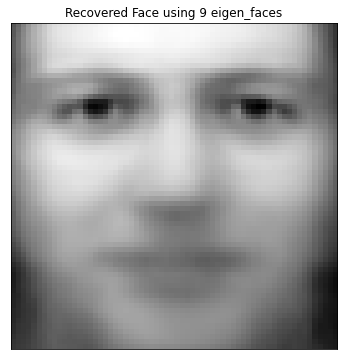

In [11]:
# plotting the recovered face
fig,ax=plt.subplots(1,1,figsize=(6,6))
ax.imshow(recovered_face.reshape(64,64), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
_ = ax.set_title('Recovered Face using 9 eigen_faces')